In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
def read_binary(restartfile):

    """
    "[...] numpy function to convert things from fortran ordered to c ordered "

    numpy.ascontiguousarray(a, dtype=None, *, like=None)

    Return a contiguous array (ndim >= 1) in memory (C order).

    """

    intchunk = np.dtype(np.int32).itemsize
    realchunk = np.dtype(np.float64).itemsize

    ncolx = np.fromfile(restartfile, dtype=np.int32, count=1, offset=0)[0]
    ncoly =  np.fromfile(restartfile, dtype=np.int32, count=1, offset=(0*realchunk+1*intchunk))[0]
    ncolz =  np.fromfile(restartfile, dtype=np.int32, count=1, offset=(0*realchunk+2*intchunk))[0]

    print(ncolx, ncoly, ncolz)

    nprod = ncolx*ncoly*ncolz

    rlam = np.fromfile(restartfile, dtype=np.float64, count=nprod*2, offset=(0*realchunk+3*intchunk)).reshape(2,ncolz,ncoly,ncolx)

    rho = np.fromfile(restartfile, dtype=np.float64, count=nprod*2, offset=(2*nprod*realchunk+3*intchunk)).reshape(2,ncolz,ncoly,ncolx)

    tau = np.fromfile(restartfile, dtype=np.float64, count=nprod*2, offset=(4*nprod*realchunk+3*intchunk)).reshape(2,ncolz,ncoly,ncolx)

    currnt = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3, offset=(6*nprod*realchunk+3*intchunk)).reshape(2,3,ncolz,ncoly,ncolx)

    sodens = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3, offset=(12*nprod*realchunk+3*intchunk)).reshape(2,3,ncolz,ncoly,ncolx)

    spinden = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3, offset=(18*nprod*realchunk+3*intchunk)).reshape(2,3,ncolz,ncoly,ncolx)

    kinvden = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3, offset=(24*nprod*realchunk+3*intchunk)).reshape(2,3,ncolz,ncoly,ncolx)

    spincur = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3*3, offset=(30*nprod*realchunk+3*intchunk)).reshape(2,3,3,ncolz,ncoly,ncolx)

    drhos = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3*2, offset=(48*nprod*realchunk+3*intchunk)).reshape(2,3,2,ncolz,ncoly,ncolx)

    return ncolx, ncoly, ncolz, rlam, rho, tau, currnt, sodens, spinden, kinvden, spincur, drhos

file = 'rlambda.dat'

ncolx, ncoly, ncolz, rlam, rho, tau, currnt, sodens,spinden,kinvden,spincur,drhos = read_binary(file)

40 24 40


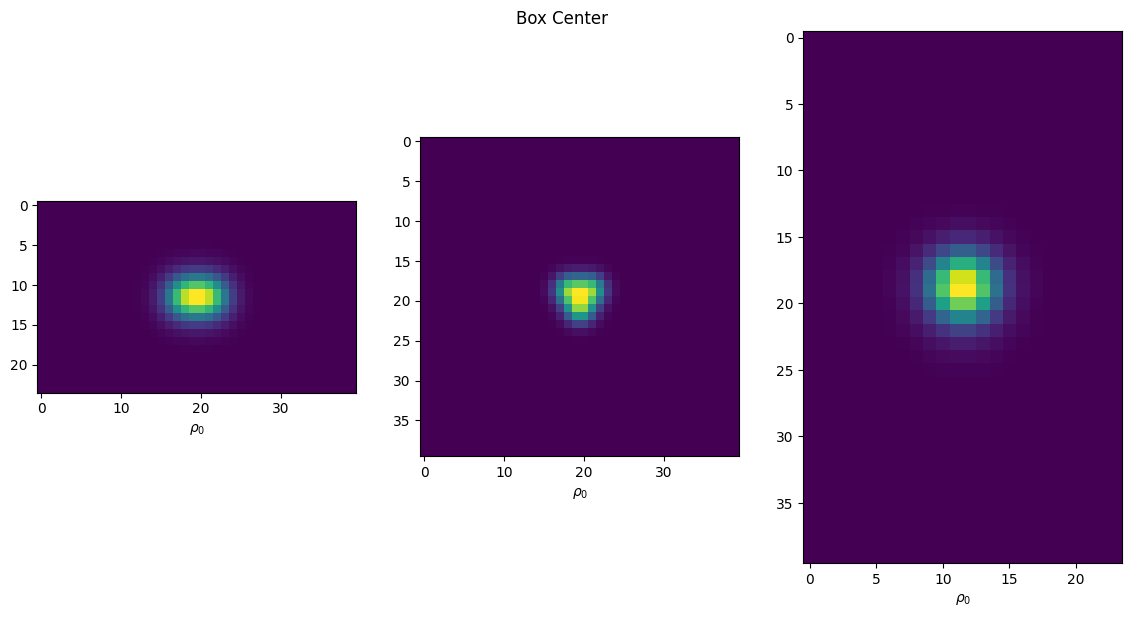

In [55]:
fs = 14
fig,axes = plt.subplots(1,3,figsize=(fs,fs))
mi = 12 # index of the box center

rho0 = rho[0,:,:,:]
rho1 = rho[1,:,:,:]

axes[0].imshow(rho[0,mi,:,:])

# axes[0].set_xlim(7,33)
#axes[0].set_ylim(3,20)
axes[0].set_xlabel(r'$\rho_0$')

axes[1].imshow(rho[0,:,mi,:])#,interpolation='gaussian')

# axes[1].set_xlim(5,35)
# axes[1].set_ylim(5,35)
axes[1].set_xlabel(r'$\rho_0$')

axes[2].imshow(rho[0,:,:,mi])#),interpolation='gaussian')

# axes[2].set_xlim(3,20)
# axes[2].set_ylim(8,28)
axes[2].set_xlabel(r'$\rho_0$');

fig.suptitle('Box Center',x=0.5,y=0.7);

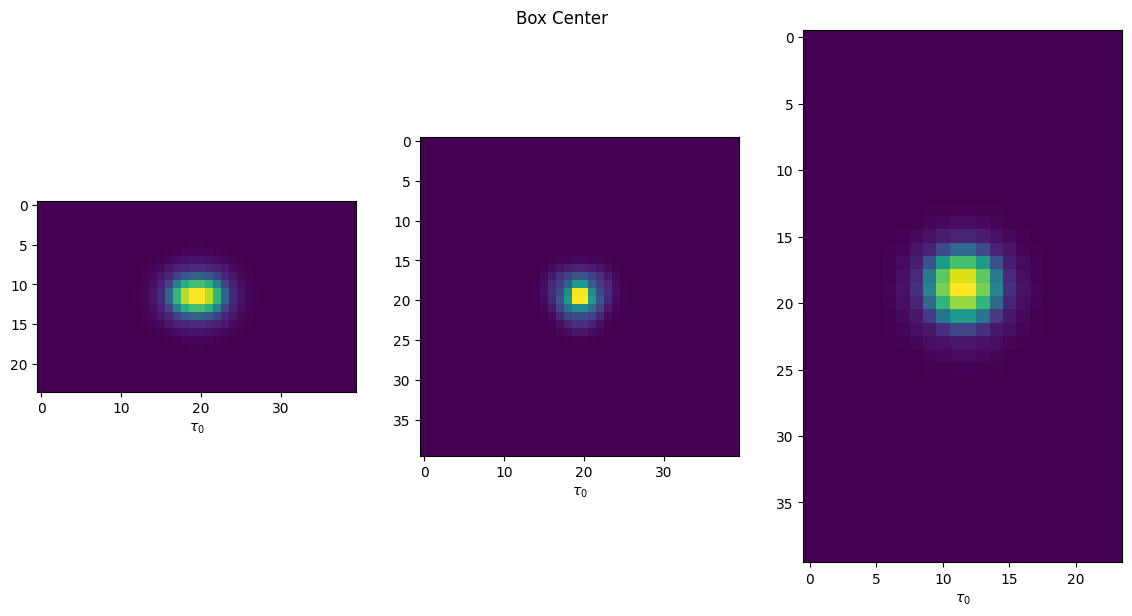

In [56]:
fs = 14
fig,axes = plt.subplots(1,3,figsize=(fs,fs))

tau0 = tau[0,:,:,:]
tau1 = tau[1,:,:,:]

axes[0].imshow(tau[0,mi,:,:])

# axes[0].set_xlim(7,33)
#axes[0].set_ylim(3,20)
axes[0].set_xlabel(r'$\tau_0$')

axes[1].imshow(tau[0,:,mi,:])#,interpolation='gaussian')

# axes[1].set_xlim(5,35)
# axes[1].set_ylim(5,35)
axes[1].set_xlabel(r'$\tau_0$')

axes[2].imshow(tau[0,:,:,mi])#),interpolation='gaussian')

# axes[2].set_xlim(3,20)
# axes[2].set_ylim(8,28)
axes[2].set_xlabel(r'$\tau_0$')

fig.suptitle('Box Center',x=0.5,y=0.7);

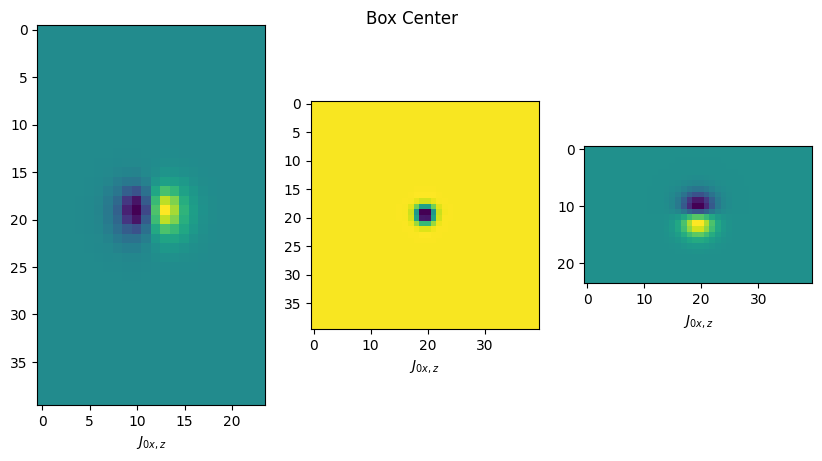

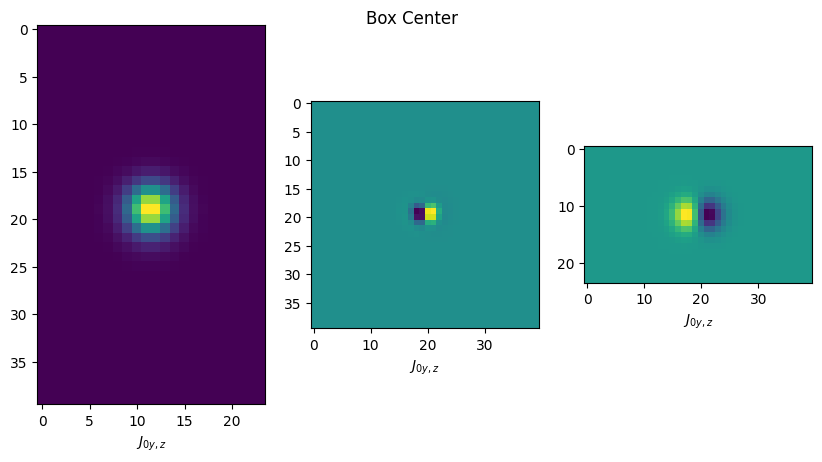

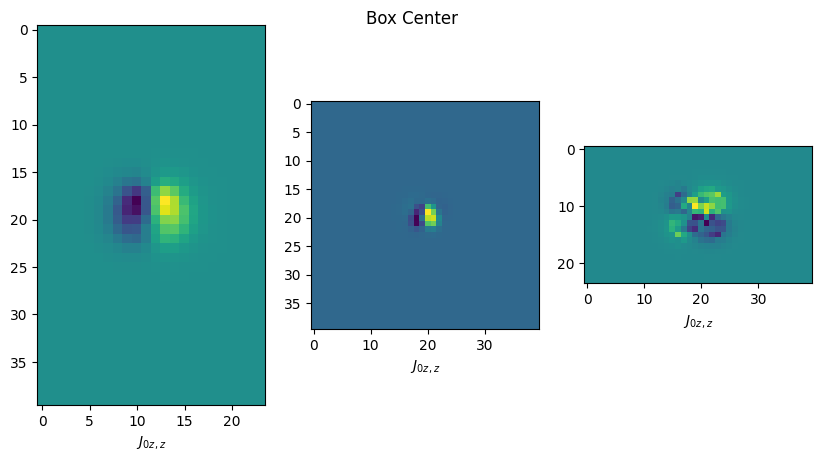

In [59]:
jx = currnt[0,0,:,:,:]
jy = currnt[0,1,:,:,:]
jz = currnt[0,2,:,:,:]

jx1 = currnt[1,0,:,:,:]
jy1 = currnt[1,1,:,:,:]
jz1 = currnt[1,2,:,:,:]

jl = [jx,jy,jz]
jsl = [r'$J_{0x}$',r'$J_{0y}$',r'$J_{0z}$']

fs = 10

for i in range(len(jl)) :

    je = jl[i]
    js = jsl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(je[:,:,mi])
    ax[0].set_xlabel(js+r'$_{,z}$')
    ax[1].imshow(je[:,mi,:])
    ax[1].set_xlabel(js+r'$_{,z}$')
    ax[2].imshow(je[mi,:,:])
    ax[2].set_xlabel(js+r'$_{,z}$')
    fig.suptitle('Box Center',x=0.5,y=0.7);

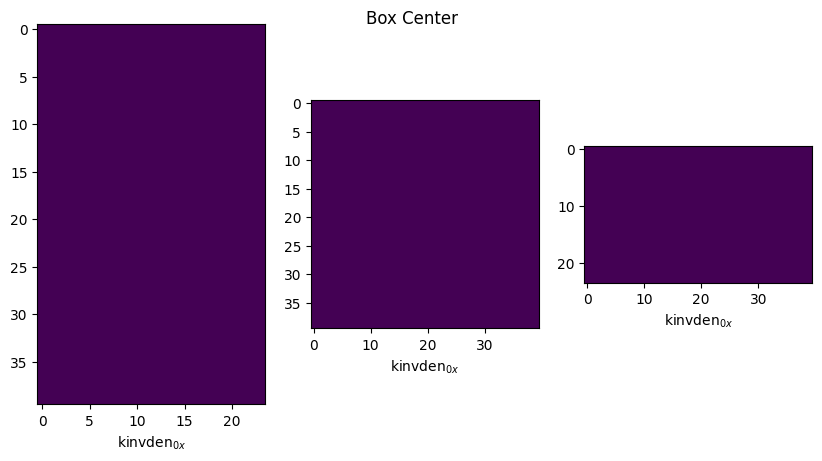

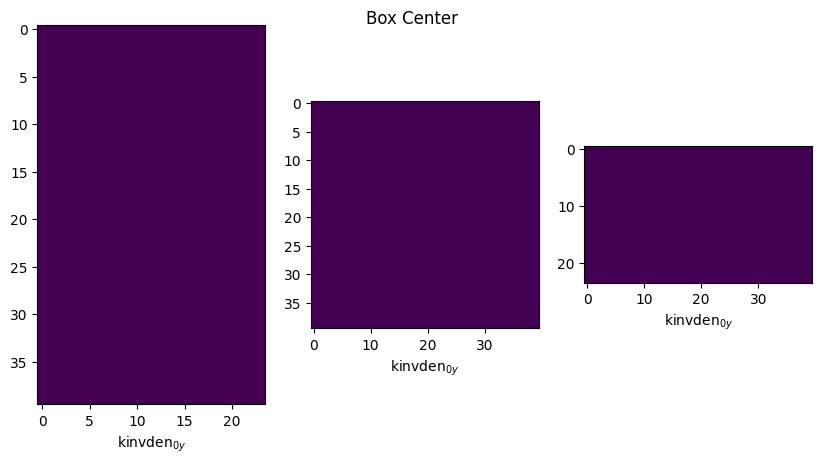

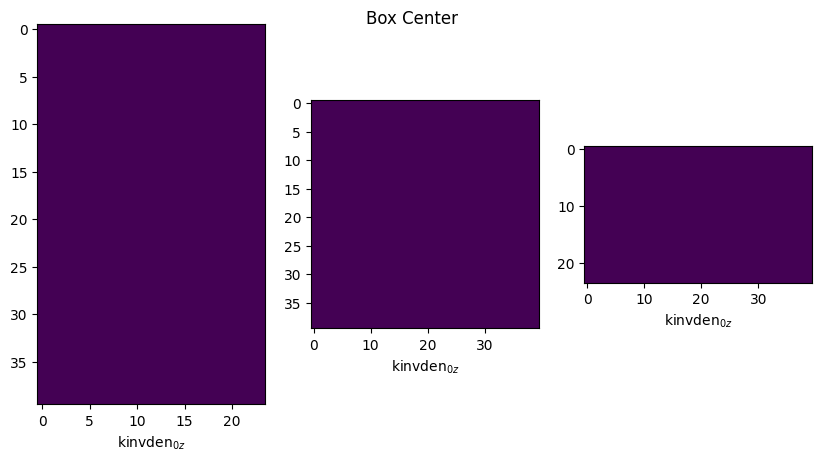

In [60]:
kinvdenx = kinvden[0,0,:,:,:]
kinvdeny = kinvden[0,1,:,:,:]
kinvdenz = kinvden[0,2,:,:,:]

kinvdenx1 = kinvden[1,0,:,:,:]
kinvdeny1 = kinvden[1,1,:,:,:]
kinvdenz1 = kinvden[1,2,:,:,:]

kl = [kinvdenx,kinvdeny,kinvdenz]
ksl = [r'kinvden$_{0x}$',r'kinvden$_{0y}$',r'kinvden$_{0z}$']

fs = 10

for i in range(len(jl)) :

    kinvdene = kl[i]
    ks = ksl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(kinvdene[:,:,mi])
    ax[0].set_xlabel(ks)
    ax[1].imshow(kinvdene[:,mi,:])
    ax[1].set_xlabel(ks)
    ax[2].imshow(kinvdene[mi,:,:])
    ax[2].set_xlabel(ks)
    fig.suptitle('Box Center',x=0.5,y=0.7);

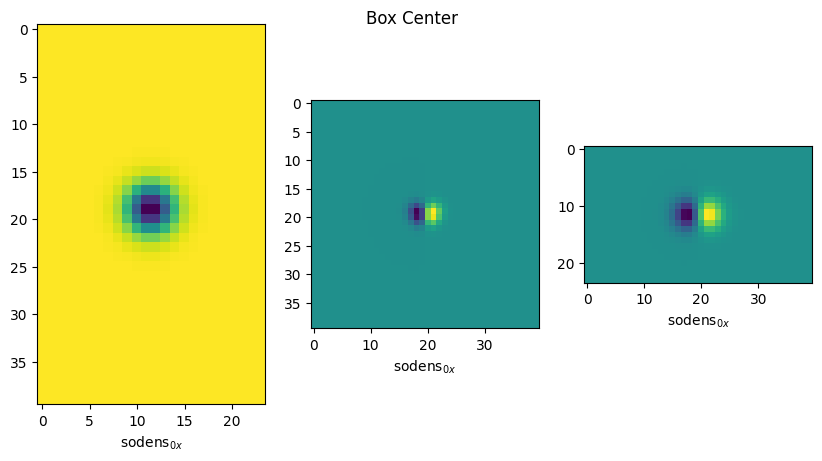

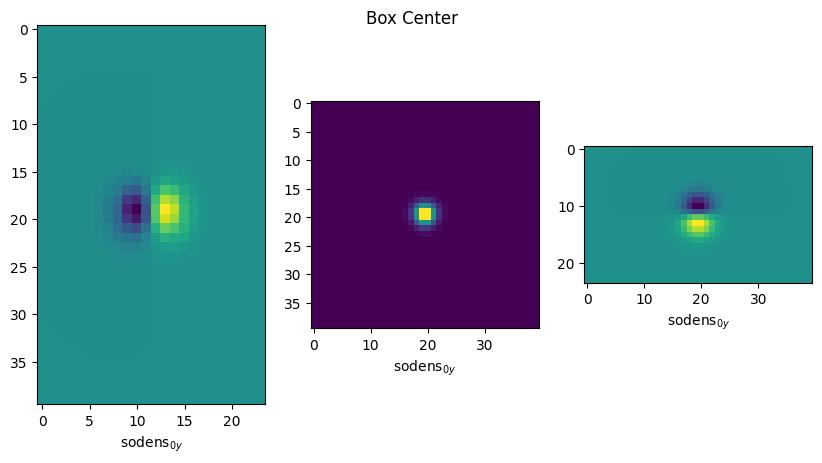

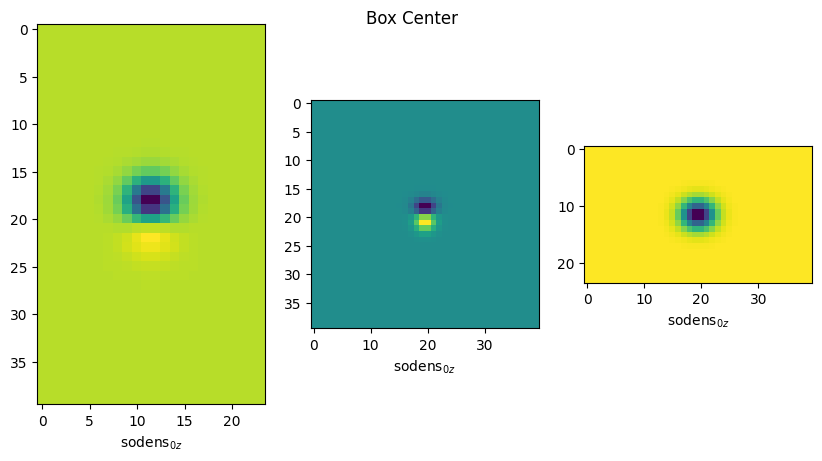

In [62]:
sodensx = sodens[0,0,:,:,:]
sodensy = sodens[0,1,:,:,:]
sodensz = sodens[0,2,:,:,:]

sodensx1 = sodens[1,0,:,:,:]
sodensy1 = sodens[1,1,:,:,:]
sodensz1 = sodens[1,2,:,:,:]

sodl = [sodensx,sodensy,sodensz]
sodsl = [r'sodens$_{0x}$',r'sodens$_{0y}$',r'sodens$_{0z}$']

fs = 10

for i in range(len(jl)) :

    je = sodl[i]
    js = sodsl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(je[:,:,mi])
    ax[0].set_xlabel(js)
    ax[1].imshow(je[:,mi,:])
    ax[1].set_xlabel(js)
    ax[2].imshow(je[mi,:,:])
    ax[2].set_xlabel(js)
    fig.suptitle('Box Center',x=0.5,y=0.7);

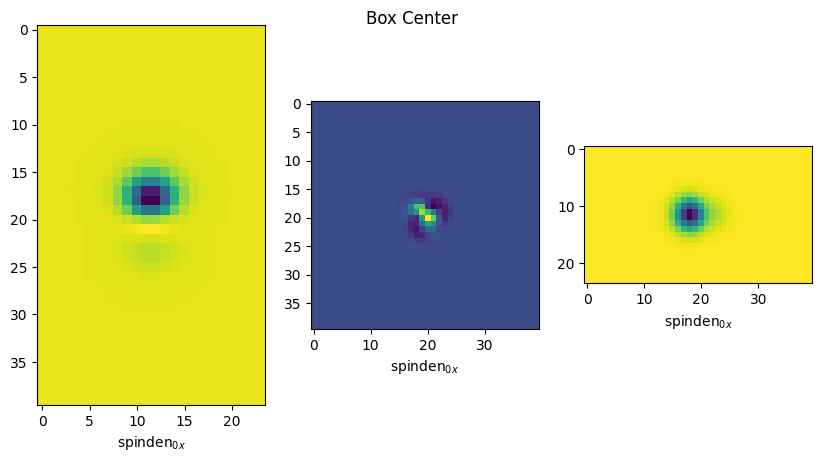

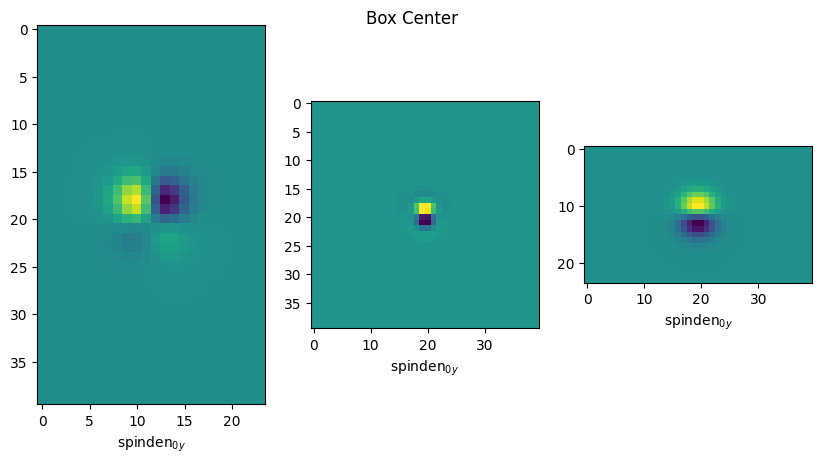

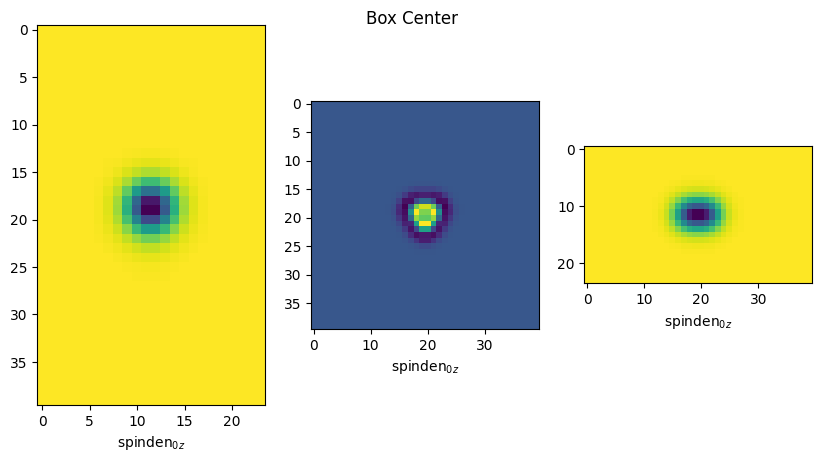

In [64]:
spindenx = spinden[0,0,:,:,:]
spindeny = spinden[0,1,:,:,:]
spindenz = spinden[0,2,:,:,:]

spindenx1 = spinden[1,0,:,:,:]
spindeny1 = spinden[1,1,:,:,:]
spindenz1 = spinden[1,2,:,:,:]

sodl = [spindenx,spindeny,spindenz]
sodsl = [r'spinden$_{0x}$',r'spinden$_{0y}$',r'spinden$_{0z}$']

fs = 10

for i in range(len(jl)) :

    je = sodl[i]
    js = sodsl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(je[:,:,mi])
    ax[0].set_xlabel(js)
    ax[1].imshow(je[:,mi,:])
    ax[1].set_xlabel(js)
    ax[2].imshow(je[mi,:,:])
    ax[2].set_xlabel(js)
    fig.suptitle('Box Center',x=0.5,y=0.7);

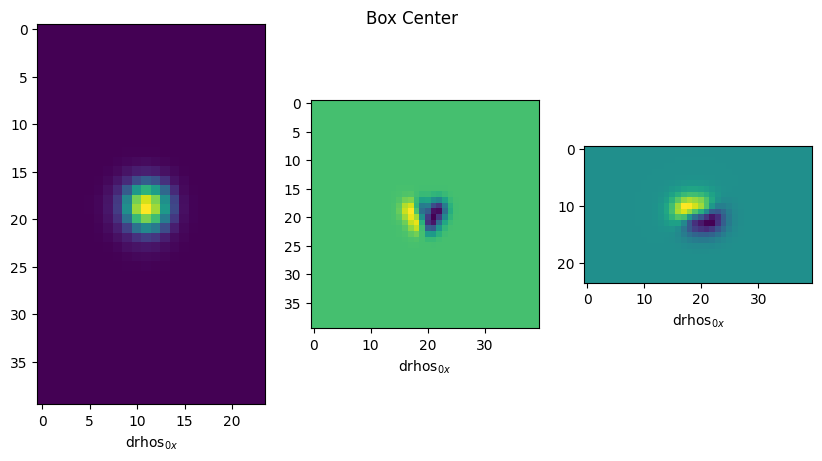

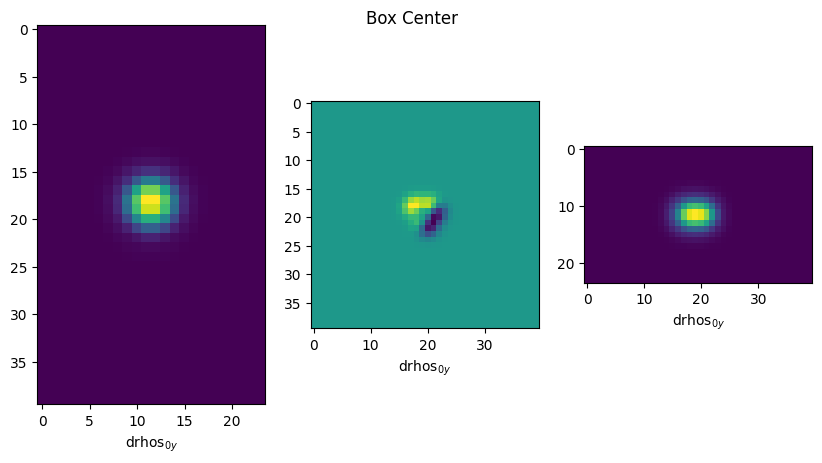

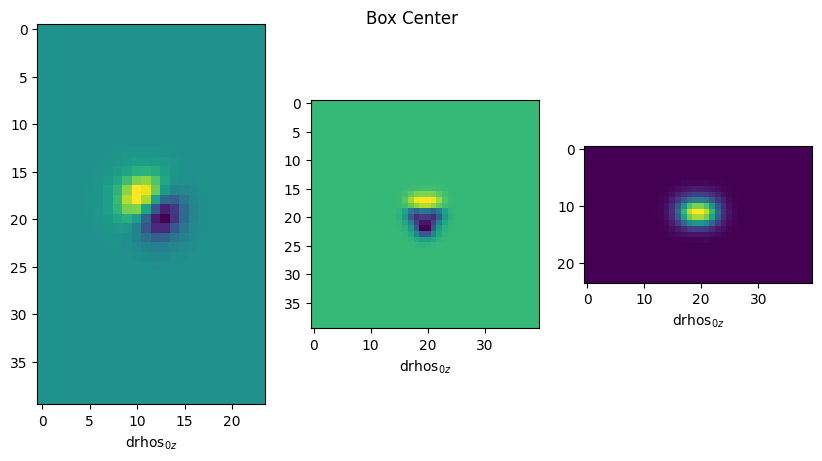

In [65]:
drhosx = drhos[0,0,0,:,:,:]+drhos[0,0,1,:,:,:]
drhosy = drhos[0,1,0,:,:,:]+drhos[0,1,1,:,:,:]
drhosz = drhos[0,2,0,:,:,:]+drhos[0,2,1,:,:,:]

drhosx1 = drhos[1,0,0,:,:,:]+drhos[1,0,1,:,:,:]
drhosy1 = drhos[1,1,0,:,:,:]+drhos[1,1,1,:,:,:]
drhosz1 = drhos[1,2,0,:,:,:]+drhos[1,2,1,:,:,:]

sodl = [drhosx,drhosy,drhosz]
sodsl = [r'drhos$_{0x}$',r'drhos$_{0y}$',r'drhos$_{0z}$']

fs = 10

for i in range(len(jl)) :

    je = sodl[i]
    js = sodsl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(je[:,:,mi])
    ax[0].set_xlabel(js)
    ax[1].imshow(je[:,mi,:])
    ax[1].set_xlabel(js)
    ax[2].imshow(je[mi,:,:])
    ax[2].set_xlabel(js)
    fig.suptitle('Box Center',x=0.5,y=0.7);

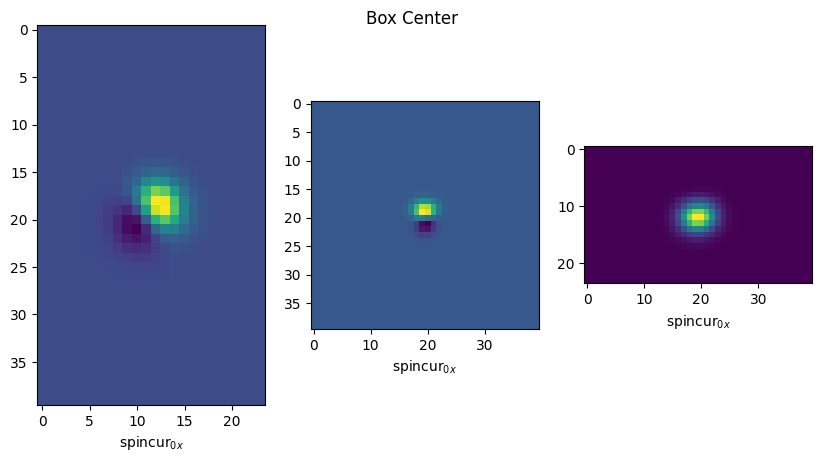

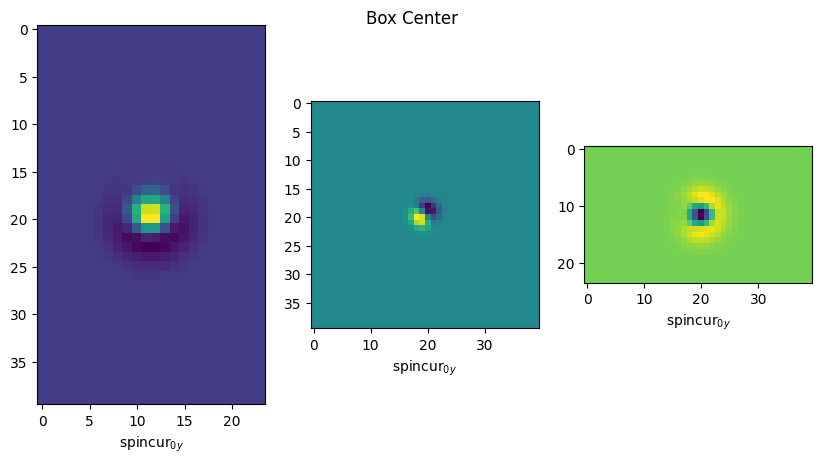

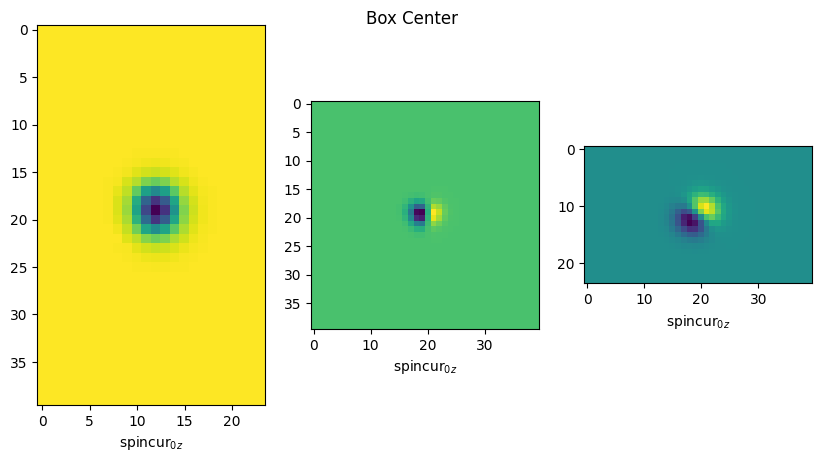

In [66]:
spincurx = spincur[0,0,0,:,:,:]+spincur[0,0,1,:,:,:]+spincur[0,0,2,:,:,:]
spincury = spincur[0,1,0,:,:,:]+spincur[0,1,1,:,:,:]+spincur[0,1,2,:,:,:]
spincurz = spincur[0,2,0,:,:,:]+spincur[0,2,1,:,:,:]+spincur[0,2,2,:,:,:]

spincurx1 = spincur[1,0,0,:,:,:]+spincur[1,0,1,:,:,:]+spincur[1,0,2,:,:,:]
spincury1 = spincur[1,1,0,:,:,:]+spincur[1,1,1,:,:,:]+spincur[1,1,2,:,:,:]
spincurz1 = spincur[1,2,0,:,:,:]+spincur[1,2,1,:,:,:]+spincur[1,2,2,:,:,:]

sodl = [spincurx,spincury,spincurz]
sodsl = [r'spincur$_{0x}$',r'spincur$_{0y}$',r'spincur$_{0z}$']

fs = 10

for i in range(len(jl)) :

    je = sodl[i]
    js = sodsl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(je[:,:,mi])
    ax[0].set_xlabel(js)
    ax[1].imshow(je[:,mi,:])
    ax[1].set_xlabel(js)
    ax[2].imshow(je[mi,:,:])
    ax[2].set_xlabel(js)
    fig.suptitle('Box Center',x=0.5,y=0.7);

In [ ]:
col_names = ['rho0','rho1','tau0','tau1','jx0','jx1','jy0','jy1','jz0','jz1',
             'kinvdenx0','kinvdenx1','kinvdeny0','kinvdeny1','kinvdenz0','kinvdenz1',
             'sodensx0','sodensx1','sodensy0','sodensy1','sodensz0','sodensz1',
             'spindenx0','spindenx1','spindeny0','spindeny1','spindenz0','spindenz1',
             'drhosx0','drhosx1','drhosy','drhosy10','drhosz','drhosz10',
             'spincurx0','spincurx1','spincury0','spincury1','spincurz0','spincurz1']

col_arrays = [rho0,rho1,tau0,tau1,jx,jx1,jy,jy1,jz,jz1,kinvdenx,kinvdenx1,
              kinvdeny,kinvdeny1,kinvdenz,kinvdenz1,sodensx,sodensx1,sodensy,sodensy1,
              sodensz,sodensz1,spindenx,spindenx1,spindeny,spindeny1,spindenz,spindenz1,
              drhosx,drhosx1,drhosy,drhosy1,drhosz,drhosz1,spincurx,spincurx1,
              spincury,spincury1,spincurz,spincurz1]

output = np.zeros((ncolx*ncoly*ncolz, 9))

for ix in range(ncolx):
    for iy in range(ncoly):
        for iz in range(ncolz):

            output[ix*ncoly*ncolz + iy*ncolz + iz, 0] = rho[0, iz, iy, ix]
            output[ix*ncoly*ncolz + iy*ncolz + iz, 1] = rho[1, iz, iy, ix]
            output[ix*ncoly*ncolz + iy*ncolz + iz, 2] = tau[0, iz, iy, ix]
            output[ix*ncoly*ncolz + iy*ncolz + iz, 3] = tau[1, iz, iy, ix]
            output[ix*ncoly*ncolz + iy*ncolz + iz, 2] = currnt[0, 0, iz, iy, ix] + currnt[1, 0, iz, iy, ix]
            output[ix*ncoly*ncolz + iy*ncolz + iz, 3] = sodens[0, 0, iz, iy, ix] + sodens[1, 0, iz, iy, ix]
            output[ix*ncoly*ncolz + iy*ncolz + iz, 4] = spinden[0, 0, iz, iy, ix] + spinden[1, 0, iz, iy, ix]
            #output[ix*ncoly*ncolz + iy*ncolz + iz, 5] = kinvden[0, 0, iz, iy, ix] + kinvden[1, 0, iz, iy, ix]
            #output[ix*ncoly*ncolz + iy*ncolz + iz, 6] = spincur[0, 0, 0, iz, iy, ix] + spincur[1, 0, 0, iz, iy, ix] # this is wrong
            output[ix*ncoly*ncolz + iy*ncolz + iz, 7] = drhos[0, 0, 0, iz, iy, ix] + drhos[1, 0, 0, iz, iy, ix] # this is wrong too
            output[ix*ncoly*ncolz + iy*ncolz + iz, 8] = rlam[0, iz, iy, ix] + rlam[1, iz, iy, ix]

np.savetxt('output.dat', output)

ValueError: Per-column arrays must each be 1-dimensional